In [116]:
import rasterio
from rasterio.plot import show
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [93]:
image = rasterio.open('GRAY_HR_SR_OB.tif')

In [94]:
image.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01666666666667, 0.0, -180.0,
        0.0, -0.01666666666667, 90.00000000000001)}

In [95]:
image_arr = image.read()

In [96]:
np.shape(image_arr)

(1, 10800, 21600)

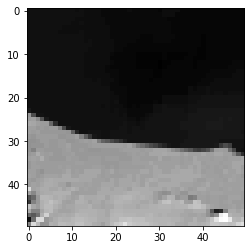

In [97]:
plt.imshow(image_arr[0][3120:3170, 13750:13800], cmap='gray')

In [98]:
hormoz_image = image_arr[0][3120:3170, 13750:13800]

In [99]:
np.shape(hormoz_image)

(50, 50)

In [103]:
X = []
for i in range(0, hormoz_image.shape[0]):
    for j in range(0, hormoz_image.shape[1]):
        if i == 0 or j == 0 or i == hormoz_image.shape[0] - 1 or j == hormoz_image.shape[1] - 1:
            p = abs(hormoz_image[i][j])
            X.append([
                p, p, p, p, p, p, p, p, p
            ])
        else:
            f1 = abs(hormoz_image[i][j])
            f2 = abs(hormoz_image[i][j] - hormoz_image[i - 1][j])
            f3 = abs(hormoz_image[i][j] - hormoz_image[i + 1][j])
            f4 = abs(hormoz_image[i][j] - hormoz_image[i][j + 1])
            f5 = abs(hormoz_image[i][j] - hormoz_image[i][j - 1])
            f6 = abs(hormoz_image[i][j] - hormoz_image[i - 1][j + 1])
            f7 = abs(hormoz_image[i][j] - hormoz_image[i - 1][j - 1])
            f8 = abs(hormoz_image[i][j] - hormoz_image[i + 1][j - 1])
            f9 = abs(hormoz_image[i][j] - hormoz_image[i + 1][j + 1])
            X.append([
                f1, f2, f3, f4, f5, f6, f7, f8, f9
            ])

/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel

In [105]:
X = np.asmatrix(X)

In [106]:
X.shape

(2500, 9)

In [126]:
msh = KMeans(n_clusters=4, n_jobs=-1)
msh.fit(X)

/home/masoud/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


KMeans(n_clusters=4, n_jobs=-1)

In [127]:
labels = msh.labels_

In [128]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([1392,  467,  357,  284]))

In [129]:
labels_im = np.full(hormoz_image.shape, -1.)

In [130]:
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

In [131]:
hormoz_cls

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [132]:
labels_im

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 0., 0., ..., 0., 0., 2.],
       [2., 0., 0., ..., 0., 0., 2.],
       ...,
       [2., 3., 3., ..., 1., 1., 3.],
       [2., 1., 0., ..., 1., 1., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

In [133]:
hormoz_image

array([[101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       ...,
       [127, 123, 130, ..., 148, 148, 147],
       [101, 129, 162, ..., 151, 150, 154],
       [135, 162, 152, ..., 154, 160, 163]], dtype=uint8)

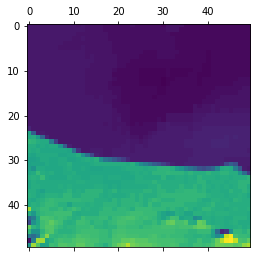

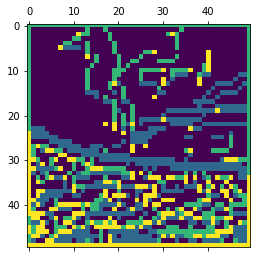

In [134]:
plt.matshow(hormoz_image)
plt.matshow(labels_im)